In [1]:
import data_loader
import numpy as np
import keras
import pickle
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the original data

In [3]:
img_dir_path = 'origin/images'
label_file_path = 'origin/data/legend.csv'
valid_rate = 0.1

train_file_paths, \
train_labels, \
valid_file_paths, \
valid_labels, \
test_file_paths, \
test_labels, \
label_dict = data_loader.load_dataset(img_dir_path, label_file_path, valid_rate)

print('train_images size is: ', len(train_file_paths))
print('valid_images size is: ', len(valid_file_paths))
print('test_images size is: ', len(test_file_paths))
print('label_dict size is: ', len(label_dict))
print(label_dict.keys())

train_images size is:  11086
valid_images size is:  1226
test_images size is:  1378
label_dict size is:  8
dict_keys(['disgust', 'fear', 'anger', 'sadness', 'contempt', 'neutral', 'surprise', 'happiness'])


[170, 11, 206, 218, 0, 5565, 299, 4617]


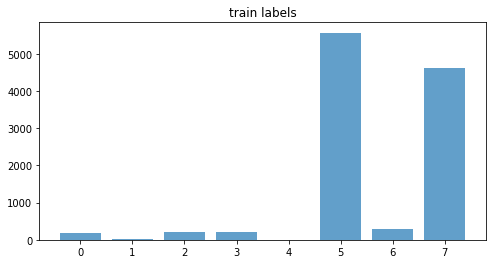

[18, 1, 22, 24, 0, 617, 33, 511]


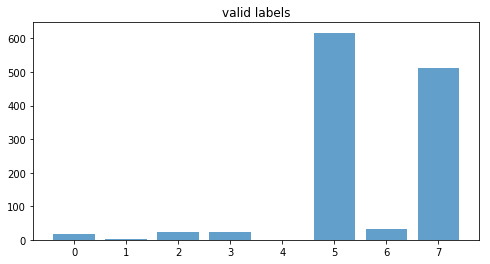

[20, 9, 24, 26, 9, 686, 36, 568]


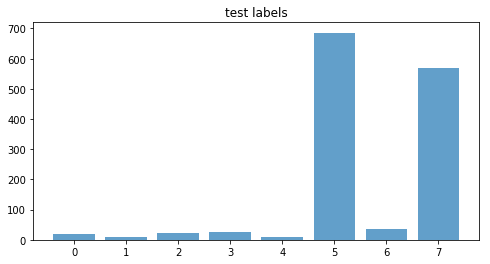

In [13]:
def count_nums(labels, types):
    count = [0, 0, 0, 0, 0, 0, 0, 0]
    for label in labels:
        count[label] += 1
    print(count)
    plt.figure(figsize=(8,4))
    plt.bar(range(len(count)), count, alpha=0.7) 
    plt.title(types + " labels") 
    plt.show()
    
count_nums(train_labels, "train")
count_nums(valid_labels, "valid")
count_nums(test_labels, "test")

### Load the extracted features by CNN

In [6]:
with open("extract/x_train_norm", "rb") as f:
    x_train = np.array(pickle.load(f))

with open("extract/x_valid_norm", "rb") as f:
    x_valid = np.array(pickle.load(f))

with open("extract/x_test_norm", "rb") as f:
    x_test = np.array(pickle.load(f))

y_train = np_utils.to_categorical(train_labels, 8)
y_valid = np_utils.to_categorical(valid_labels, 8)
y_test = np_utils.to_categorical(test_labels, 8)

print("x_train is", x_train.shape)
print("x_valid is", x_valid.shape)
print("x_test is", x_test.shape)

print("y_train is", y_train.shape)
print("y_valid is", y_valid.shape)
print("y_test is", y_test.shape)



x_train is (11086, 512)
x_valid is (1226, 512)
x_test is (1378, 512)
y_train is (11086, 8)
y_valid is (1226, 8)
y_test is (1378, 8)


Train on 11086 samples, validate on 1226 samples
Epoch 1/1000
11086/11086 [==============================] - 1s 127us/step - loss: 0.4372 - acc: 0.7961 - val_loss: 0.2349 - val_acc: 0.8654
Epoch 2/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.3084 - acc: 0.8512 - val_loss: 0.2218 - val_acc: 0.8756
Epoch 3/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.2698 - acc: 0.8645 - val_loss: 0.2217 - val_acc: 0.8758
Epoch 4/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.2566 - acc: 0.8700 - val_loss: 0.2216 - val_acc: 0.8723
Epoch 5/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.2480 - acc: 0.8721 - val_loss: 0.2219 - val_acc: 0.8758
Epoch 6/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.2450 - acc: 0.8740 - val_loss: 0.2232 - val_acc: 0.8758
Epoch 7/1000
11086/11086 [==============================] - 0s 28us/step - loss: 0.2420 - acc: 0.8735 - val_loss: 0.

11086/11086 [==============================] - 0s 26us/step - loss: 0.2226 - acc: 0.8767 - val_loss: 0.2230 - val_acc: 0.8763
Epoch 60/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2235 - acc: 0.8774 - val_loss: 0.2230 - val_acc: 0.8734
Epoch 61/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2229 - acc: 0.8774 - val_loss: 0.2229 - val_acc: 0.8769
Epoch 62/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2231 - acc: 0.8774 - val_loss: 0.2232 - val_acc: 0.8761
Epoch 63/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2229 - acc: 0.8763 - val_loss: 0.2227 - val_acc: 0.8751
Epoch 64/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2229 - acc: 0.8776 - val_loss: 0.2234 - val_acc: 0.8741
Epoch 65/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2226 - acc: 0.8767 - val_loss: 0.2241 - val_acc: 0.8768
Epoch 66/1000
11086/11086 [=======

11086/11086 [==============================] - 0s 25us/step - loss: 0.2188 - acc: 0.8798 - val_loss: 0.2270 - val_acc: 0.8748
Epoch 118/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.2184 - acc: 0.8799 - val_loss: 0.2284 - val_acc: 0.8752
Epoch 119/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.2185 - acc: 0.8807 - val_loss: 0.2269 - val_acc: 0.8752
Epoch 120/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2184 - acc: 0.8804 - val_loss: 0.2270 - val_acc: 0.8741
Epoch 121/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2182 - acc: 0.8806 - val_loss: 0.2269 - val_acc: 0.8767
Epoch 122/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2178 - acc: 0.8809 - val_loss: 0.2291 - val_acc: 0.8770
Epoch 123/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2181 - acc: 0.8803 - val_loss: 0.2285 - val_acc: 0.8754
Epoch 124/1000
11086/11086 [

11086/11086 [==============================] - 0s 25us/step - loss: 0.2107 - acc: 0.8882 - val_loss: 0.2352 - val_acc: 0.8737
Epoch 176/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2117 - acc: 0.8870 - val_loss: 0.2321 - val_acc: 0.8770
Epoch 177/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.2106 - acc: 0.8868 - val_loss: 0.2336 - val_acc: 0.8782
Epoch 178/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.2106 - acc: 0.8875 - val_loss: 0.2338 - val_acc: 0.8761
Epoch 179/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.2100 - acc: 0.8874 - val_loss: 0.2362 - val_acc: 0.8749
Epoch 180/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2102 - acc: 0.8884 - val_loss: 0.2387 - val_acc: 0.8761
Epoch 181/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.2104 - acc: 0.8879 - val_loss: 0.2398 - val_acc: 0.8728
Epoch 182/1000
11086/11086 [

11086/11086 [==============================] - 0s 28us/step - loss: 0.1986 - acc: 0.8969 - val_loss: 0.2613 - val_acc: 0.8743
Epoch 234/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1987 - acc: 0.8984 - val_loss: 0.2547 - val_acc: 0.8749
Epoch 235/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1980 - acc: 0.8965 - val_loss: 0.2615 - val_acc: 0.8740
Epoch 236/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1972 - acc: 0.8975 - val_loss: 0.2609 - val_acc: 0.8685
Epoch 237/1000
11086/11086 [==============================] - 0s 30us/step - loss: 0.1983 - acc: 0.8959 - val_loss: 0.2655 - val_acc: 0.8705
Epoch 238/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1961 - acc: 0.8983 - val_loss: 0.2618 - val_acc: 0.8726
Epoch 239/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1966 - acc: 0.8980 - val_loss: 0.2644 - val_acc: 0.8732
Epoch 240/1000
11086/11086 [

11086/11086 [==============================] - 0s 29us/step - loss: 0.1830 - acc: 0.9096 - val_loss: 0.2966 - val_acc: 0.8665
Epoch 292/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1852 - acc: 0.9068 - val_loss: 0.2875 - val_acc: 0.8680
Epoch 293/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1844 - acc: 0.9073 - val_loss: 0.2942 - val_acc: 0.8669
Epoch 294/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1817 - acc: 0.9101 - val_loss: 0.3045 - val_acc: 0.8668
Epoch 295/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1817 - acc: 0.9099 - val_loss: 0.2980 - val_acc: 0.8675
Epoch 296/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1831 - acc: 0.9095 - val_loss: 0.3085 - val_acc: 0.8646
Epoch 297/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1828 - acc: 0.9088 - val_loss: 0.2944 - val_acc: 0.8623
Epoch 298/1000
11086/11086 [

11086/11086 [==============================] - 0s 27us/step - loss: 0.1710 - acc: 0.9156 - val_loss: 0.3461 - val_acc: 0.8640
Epoch 350/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1738 - acc: 0.9131 - val_loss: 0.3375 - val_acc: 0.8648
Epoch 351/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1716 - acc: 0.9156 - val_loss: 0.3535 - val_acc: 0.8683
Epoch 352/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1730 - acc: 0.9146 - val_loss: 0.3481 - val_acc: 0.8614
Epoch 353/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1701 - acc: 0.9168 - val_loss: 0.3432 - val_acc: 0.8648
Epoch 354/1000
11086/11086 [==============================] - 0s 28us/step - loss: 0.1704 - acc: 0.9170 - val_loss: 0.3516 - val_acc: 0.8603
Epoch 355/1000
11086/11086 [==============================] - 0s 28us/step - loss: 0.1700 - acc: 0.9170 - val_loss: 0.3573 - val_acc: 0.8639
Epoch 356/1000
11086/11086 [

11086/11086 [==============================] - 0s 27us/step - loss: 0.1651 - acc: 0.9195 - val_loss: 0.4095 - val_acc: 0.8625
Epoch 408/1000
11086/11086 [==============================] - 0s 28us/step - loss: 0.1632 - acc: 0.9218 - val_loss: 0.4214 - val_acc: 0.8630
Epoch 409/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1653 - acc: 0.9188 - val_loss: 0.3816 - val_acc: 0.8677
Epoch 410/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1635 - acc: 0.9199 - val_loss: 0.4153 - val_acc: 0.8692
Epoch 411/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1616 - acc: 0.9222 - val_loss: 0.4056 - val_acc: 0.8653
Epoch 412/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1617 - acc: 0.9225 - val_loss: 0.4230 - val_acc: 0.8670
Epoch 413/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1598 - acc: 0.9230 - val_loss: 0.4134 - val_acc: 0.8656
Epoch 414/1000
11086/11086 [

11086/11086 [==============================] - 0s 27us/step - loss: 0.1591 - acc: 0.9232 - val_loss: 0.4307 - val_acc: 0.8674
Epoch 466/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1592 - acc: 0.9231 - val_loss: 0.4408 - val_acc: 0.8683
Epoch 467/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1581 - acc: 0.9243 - val_loss: 0.4342 - val_acc: 0.8683
Epoch 468/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1616 - acc: 0.9223 - val_loss: 0.4198 - val_acc: 0.8695
Epoch 469/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1615 - acc: 0.9206 - val_loss: 0.4178 - val_acc: 0.8708
Epoch 470/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1625 - acc: 0.9191 - val_loss: 0.4006 - val_acc: 0.8647
Epoch 471/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1600 - acc: 0.9228 - val_loss: 0.4266 - val_acc: 0.8662
Epoch 472/1000
11086/11086 [

11086/11086 [==============================] - 0s 26us/step - loss: 0.1585 - acc: 0.9243 - val_loss: 0.4590 - val_acc: 0.8699
Epoch 524/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1569 - acc: 0.9242 - val_loss: 0.5088 - val_acc: 0.8697
Epoch 525/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1563 - acc: 0.9252 - val_loss: 0.4711 - val_acc: 0.8648
Epoch 526/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1551 - acc: 0.9255 - val_loss: 0.4776 - val_acc: 0.8694
Epoch 527/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1572 - acc: 0.9249 - val_loss: 0.4578 - val_acc: 0.8667
Epoch 528/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1589 - acc: 0.9219 - val_loss: 0.4545 - val_acc: 0.8692
Epoch 529/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1594 - acc: 0.9226 - val_loss: 0.4635 - val_acc: 0.8712
Epoch 530/1000
11086/11086 [

11086/11086 [==============================] - 0s 25us/step - loss: 0.1567 - acc: 0.9242 - val_loss: 0.4856 - val_acc: 0.8617
Epoch 582/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1533 - acc: 0.9273 - val_loss: 0.4986 - val_acc: 0.8668
Epoch 583/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1557 - acc: 0.9241 - val_loss: 0.5195 - val_acc: 0.8661
Epoch 584/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1560 - acc: 0.9240 - val_loss: 0.5221 - val_acc: 0.8660
Epoch 585/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1554 - acc: 0.9245 - val_loss: 0.5143 - val_acc: 0.8700
Epoch 586/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1559 - acc: 0.9251 - val_loss: 0.4981 - val_acc: 0.8700
Epoch 587/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1575 - acc: 0.9236 - val_loss: 0.5024 - val_acc: 0.8661
Epoch 588/1000
11086/11086 [

11086/11086 [==============================] - 0s 26us/step - loss: 0.1550 - acc: 0.9268 - val_loss: 0.5388 - val_acc: 0.8705
Epoch 640/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1501 - acc: 0.9288 - val_loss: 0.5416 - val_acc: 0.8697
Epoch 641/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1504 - acc: 0.9276 - val_loss: 0.5396 - val_acc: 0.8701
Epoch 642/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1497 - acc: 0.9289 - val_loss: 0.5634 - val_acc: 0.8756
Epoch 643/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1513 - acc: 0.9271 - val_loss: 0.5874 - val_acc: 0.8738
Epoch 644/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1541 - acc: 0.9252 - val_loss: 0.5672 - val_acc: 0.8678
Epoch 645/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1505 - acc: 0.9279 - val_loss: 0.5488 - val_acc: 0.8748
Epoch 646/1000
11086/11086 [

11086/11086 [==============================] - 0s 26us/step - loss: 0.1520 - acc: 0.9288 - val_loss: 0.6174 - val_acc: 0.8674
Epoch 698/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1516 - acc: 0.9296 - val_loss: 0.5411 - val_acc: 0.8730
Epoch 699/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1516 - acc: 0.9293 - val_loss: 0.5789 - val_acc: 0.8737
Epoch 700/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1521 - acc: 0.9297 - val_loss: 0.5913 - val_acc: 0.8711
Epoch 701/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1530 - acc: 0.9273 - val_loss: 0.5176 - val_acc: 0.8681
Epoch 702/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1547 - acc: 0.9273 - val_loss: 0.6057 - val_acc: 0.8722
Epoch 703/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1541 - acc: 0.9277 - val_loss: 0.5731 - val_acc: 0.8734
Epoch 704/1000
11086/11086 [

11086/11086 [==============================] - 0s 27us/step - loss: 0.1545 - acc: 0.9268 - val_loss: 0.5895 - val_acc: 0.8655
Epoch 756/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1547 - acc: 0.9260 - val_loss: 0.5762 - val_acc: 0.8639
Epoch 757/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1507 - acc: 0.9283 - val_loss: 0.6060 - val_acc: 0.8690
Epoch 758/1000
11086/11086 [==============================] - 0s 29us/step - loss: 0.1521 - acc: 0.9266 - val_loss: 0.5689 - val_acc: 0.8648
Epoch 759/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1516 - acc: 0.9268 - val_loss: 0.5950 - val_acc: 0.8666
Epoch 760/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1511 - acc: 0.9272 - val_loss: 0.6070 - val_acc: 0.8753
Epoch 761/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1501 - acc: 0.9270 - val_loss: 0.5959 - val_acc: 0.8691
Epoch 762/1000
11086/11086 [

11086/11086 [==============================] - 0s 26us/step - loss: 0.1511 - acc: 0.9291 - val_loss: 0.6344 - val_acc: 0.8664
Epoch 814/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1519 - acc: 0.9292 - val_loss: 0.6734 - val_acc: 0.8654
Epoch 815/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1537 - acc: 0.9277 - val_loss: 0.5895 - val_acc: 0.8679
Epoch 816/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1554 - acc: 0.9256 - val_loss: 0.5969 - val_acc: 0.8657
Epoch 817/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1525 - acc: 0.9285 - val_loss: 0.5871 - val_acc: 0.8686
Epoch 818/1000
11086/11086 [==============================] - 0s 28us/step - loss: 0.1488 - acc: 0.9309 - val_loss: 0.6598 - val_acc: 0.8683
Epoch 819/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1472 - acc: 0.9311 - val_loss: 0.6610 - val_acc: 0.8667
Epoch 820/1000
11086/11086 [

11086/11086 [==============================] - 0s 24us/step - loss: 0.1577 - acc: 0.9220 - val_loss: 0.5787 - val_acc: 0.8648
Epoch 872/1000
11086/11086 [==============================] - 0s 24us/step - loss: 0.1554 - acc: 0.9247 - val_loss: 0.6211 - val_acc: 0.8675
Epoch 873/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1595 - acc: 0.9234 - val_loss: 0.5721 - val_acc: 0.8679
Epoch 874/1000
11086/11086 [==============================] - 0s 24us/step - loss: 0.1597 - acc: 0.9221 - val_loss: 0.5990 - val_acc: 0.8676
Epoch 875/1000
11086/11086 [==============================] - 0s 24us/step - loss: 0.1550 - acc: 0.9256 - val_loss: 0.5896 - val_acc: 0.8688
Epoch 876/1000
11086/11086 [==============================] - 0s 24us/step - loss: 0.1523 - acc: 0.9273 - val_loss: 0.5736 - val_acc: 0.8681
Epoch 877/1000
11086/11086 [==============================] - 0s 25us/step - loss: 0.1532 - acc: 0.9264 - val_loss: 0.5841 - val_acc: 0.8685
Epoch 878/1000
11086/11086 [

11086/11086 [==============================] - 0s 24us/step - loss: 0.1540 - acc: 0.9264 - val_loss: 0.6522 - val_acc: 0.8649
Epoch 930/1000
11086/11086 [==============================] - 0s 23us/step - loss: 0.1509 - acc: 0.9289 - val_loss: 0.6373 - val_acc: 0.8665
Epoch 931/1000
11086/11086 [==============================] - 0s 23us/step - loss: 0.1496 - acc: 0.9291 - val_loss: 0.6206 - val_acc: 0.8639
Epoch 932/1000
11086/11086 [==============================] - 0s 23us/step - loss: 0.1532 - acc: 0.9273 - val_loss: 0.6117 - val_acc: 0.8633
Epoch 933/1000
11086/11086 [==============================] - 0s 28us/step - loss: 0.1507 - acc: 0.9286 - val_loss: 0.6295 - val_acc: 0.8637
Epoch 934/1000
11086/11086 [==============================] - 0s 28us/step - loss: 0.1474 - acc: 0.9310 - val_loss: 0.6908 - val_acc: 0.8702
Epoch 935/1000
11086/11086 [==============================] - 0s 29us/step - loss: 0.1477 - acc: 0.9312 - val_loss: 0.6590 - val_acc: 0.8689
Epoch 936/1000
11086/11086 [

11086/11086 [==============================] - 0s 26us/step - loss: 0.1441 - acc: 0.9326 - val_loss: 0.6638 - val_acc: 0.8676
Epoch 988/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1471 - acc: 0.9313 - val_loss: 0.7221 - val_acc: 0.8666
Epoch 989/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1492 - acc: 0.9293 - val_loss: 0.6531 - val_acc: 0.8674
Epoch 990/1000
11086/11086 [==============================] - 0s 27us/step - loss: 0.1500 - acc: 0.9293 - val_loss: 0.7424 - val_acc: 0.8658
Epoch 991/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1492 - acc: 0.9304 - val_loss: 0.6601 - val_acc: 0.8657
Epoch 992/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1517 - acc: 0.9282 - val_loss: 0.7351 - val_acc: 0.8709
Epoch 993/1000
11086/11086 [==============================] - 0s 26us/step - loss: 0.1505 - acc: 0.9285 - val_loss: 0.6288 - val_acc: 0.8663
Epoch 994/1000
11086/11086 [

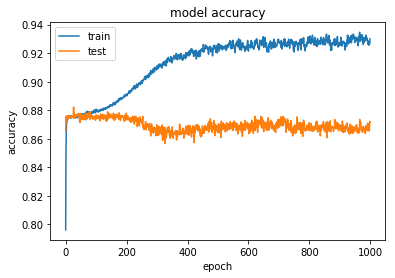

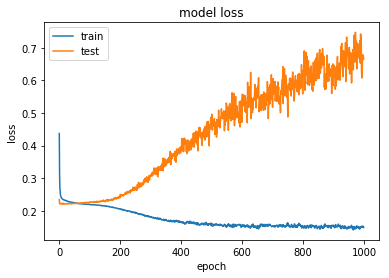

In [24]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=512))
model.add(Dropout(0.7))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(0.7))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dropout(0.7))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(units=8, activation='sigmoid'))

sgd = SGD(lr=3e-4, momentum=0.9)
rms = RMSprop(lr=1e-3, rho=0.9)
adam = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)

model.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

# Fit the model
history = model.fit(x_train, y_train, epochs=1000, batch_size=128, verbose=1, validation_data=(x_valid, y_valid))
print(history.history.keys())

# accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [53]:
scores = model.evaluate(x=x_test, y=y_test, batch_size=64, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1378/1378 [==============================] - 0s 18us/step
[3.5545830567447125, 0.45428156748911463]
acc: 45.43%
